# Programming Assignment - 7
---
## Name:
---

In [11]:
# Import required package
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from PIL import Image

In [16]:
"""This function helps visualising the portraits from the dataset."""
def plot_gallary(images,height, width, rows, cols):
    plt.figure(figsize=(2 * cols, 2 * rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.30,)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(i)
        plt.xticks(())
        plt.yticks(())

In [9]:
#used this to resize all images
dir='test' 
filenames=os.listdir(dir)
h=500
w=500
for filename in filenames:
    img_path = os.path.join(dir,filename)
    with Image.open(img_path) as img:
        img=img.resize((w,h))
        img.save(os.path.join(dir,f"resized_{filename}"))


In [30]:
dir='test'
people=os.listdir(dir)[1:601]#couldnt load anymore pictures,laptop kept crashing

Dimensions of the array holding all images: (600, 500, 500)


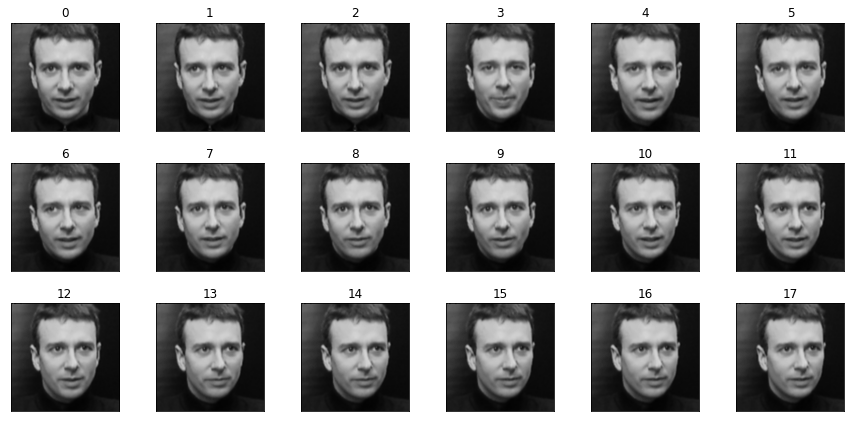

In [38]:
#Relative path for every images file
file=[dir+'/' + face for face in people]
#Read all the image files
all_images=np.array([plt.imread(face) for face in file], dtype=np.float64)
# Find the dimension of the ndarray holdig all the images
print("Dimensions of the array holding all images:",all_images.shape)
# Show a few images
n_samples,h,w=all_images.shape
plot_gallary(all_images,h, w, rows=3, cols=6)


In [39]:
def eigenfaces(X, n_pc):
    n_samples, n_features = X.shape
    X_mean = np.mean(X, axis=0)
    centered_X = X-X_mean
    pca = PCA(n_components=n_pc)
    projected  = pca.fit_transform(centered_X)
    components = pca.components_
    
    return projected, components, X_mean, centered_X

In [40]:
n_components = 50
X = all_images.reshape(n_samples, h*w)
P, C, M, Y= eigenfaces(X, n_components)

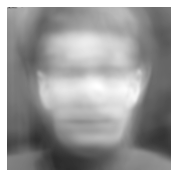

In [41]:
plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)
plt.show()

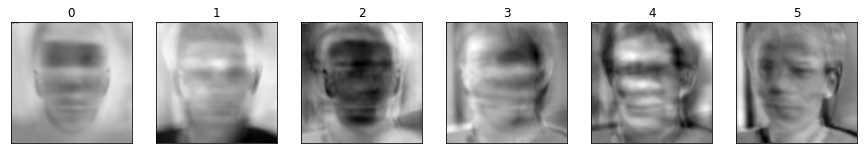

In [42]:
# Here is the face-space made of all the eigenface
eigenfaces = C.reshape((n_components, h, w))
# Give the eigenfaces some names.
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallary(eigenfaces, h, w, 1, 6) 

In [43]:
# Let us see a low-rank reconstruction of some facial images
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image

recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(600)]

Some reconstructions:

Compare with the originals:



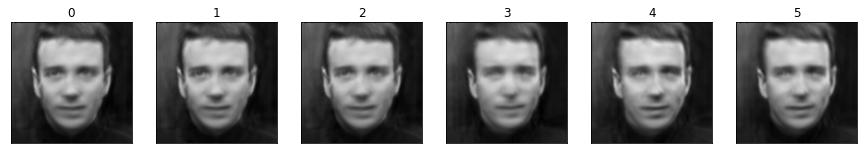

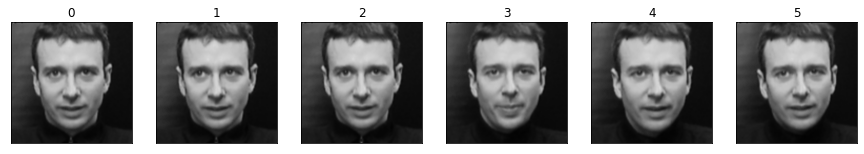

In [44]:
print("Some reconstructions:\n")
plot_gallary(recovered_images, h, w, rows=1, cols=6)

print("Compare with the originals:\n")
plot_gallary(all_images, h, w, rows=1, cols=6)

## Question 1
---
Follow the example on Eigenfaces to find the eigenface representation of facial images from other sources. You should display some original images and compare them with their reconstructions upon PCA.

Here are some other facial image repositories.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).